In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Default plotting settings for matplotlib
plt.rc('figure', figsize=(8, 6), dpi=100)

# Datasets

## `hexagon`

In [3]:
hexagon = pd.read_csv('data/hexagon.csv')

In [4]:
hexagon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       600 non-null    float64
 1   y       600 non-null    float64
 2   c       600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


In [5]:
hexagon.describe()

,x,y,c
count,600.000000,600.000000,600.00000
mean,0.006708,-0.056915,2.50000
std,2.254771,4.377301,1.70925
min,-4.561541,-8.632626,0.00000
25%,-2.031596,-3.612048,1.00000
50%,-0.017880,-0.815813,2.50000
75%,2.153962,3.580985,4.00000
max,4.727185,8.188139,5.00000


In [6]:
hexagon['c'].value_counts()

1    100
0    100
2    100
4    100
3    100
5    100
Name: c, dtype: int64

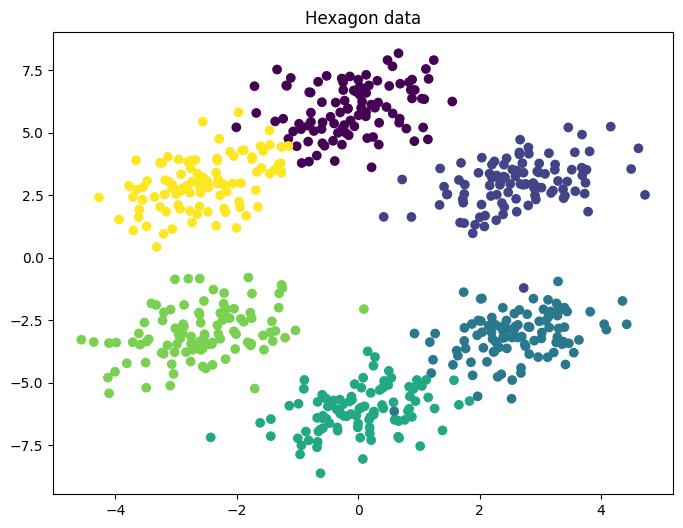

In [7]:
plt.scatter(x='x', y='y', data=hexagon, c='c')
plt.title('Hexagon data')
plt.show()

In [8]:
hex_xy = hexagon[['x', 'y']].to_numpy().reshape((-1, 2))

## `cube`

In [9]:
cube = pd.read_csv('data/cube.csv')

In [10]:
cube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1200 non-null   float64
 1   y       1200 non-null   float64
 2   z       1200 non-null   float64
 3   c       1200 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 37.6 KB


In [11]:
cube.describe()

,x,y,z,c
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,1.482818,2.016366,1.007087,3.500000
std,1.601430,2.128296,1.132364,2.292243
min,-1.986048,-2.262178,-1.619699,0.000000
25%,-0.031297,-0.000977,-0.000701,1.750000
50%,1.414436,1.917702,0.965217,3.500000
75%,2.978607,4.055595,2.010555,5.250000
max,4.996167,6.078151,3.621737,7.000000


In [12]:
cube['c'].value_counts()

0    150
1    150
2    150
3    150
4    150
5    150
6    150
7    150
Name: c, dtype: int64

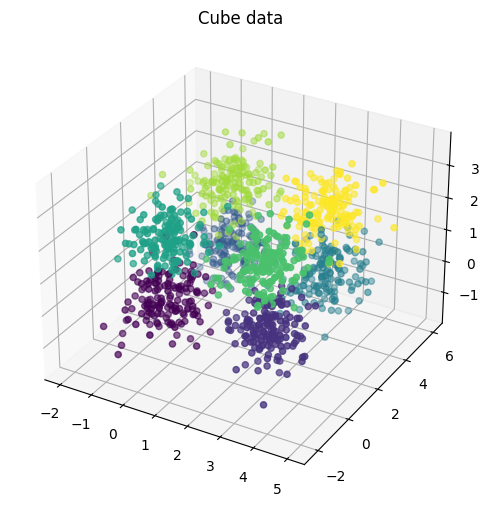

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter('x', 'y', 'z', data=cube, c='c')
plt.title('Cube data')
plt.show()

In [14]:
cube_xyz = cube[['x', 'y', 'z']].to_numpy().reshape((-1, 3))

# Kohonen network testing

In [15]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

from kohonenn.network import KohonenNetwork
from kohonenn.neighbourhood_func import GaussFunction, MexicanHat
from kohonenn.lr_decay_functions import alpha_func

In [16]:
def print_scores(true_labels: np.ndarray, pred_labels: np.ndarray):
    _true_labels = np.squeeze(true_labels)
    _pred_labels = np.squeeze(pred_labels)

    ar = adjusted_rand_score(_true_labels, _pred_labels)
    ami = adjusted_mutual_info_score(_true_labels, _pred_labels)

    print(f'Adjusted Rand score: {ar:.3f}')
    print(f'Adjusted Mutual Information score: {ami:.3f}')

## `hexagon`

### Gaussian neighbourhood function

In [17]:
koh_hex_gauss = KohonenNetwork(
    input_size=2, output_dim=(3, 2),
)

In [18]:
koh_hex_gauss.train(
    data=hex_xy, epochs=50, init_lr=1, lr_decay_func=alpha_func, 
    neighbourhood_func=GaussFunction(nbhood_width_factor=0.1),
    verbosity_period=25, random_state=3,
)

Epoch 25 done!
   - mean abs delta = 0.08608360811763037
   - max abs delta = 2.1334972721585843
Epoch 50 done!
   - mean abs delta = 0.04696162331324212
   - max abs delta = 1.0445268277295208


In [19]:
pred = koh_hex_gauss.predict(hex_xy)
print_scores(hexagon['c'], pred)

Adjusted Rand score: 0.953
Adjusted Mutual Information score: 0.949


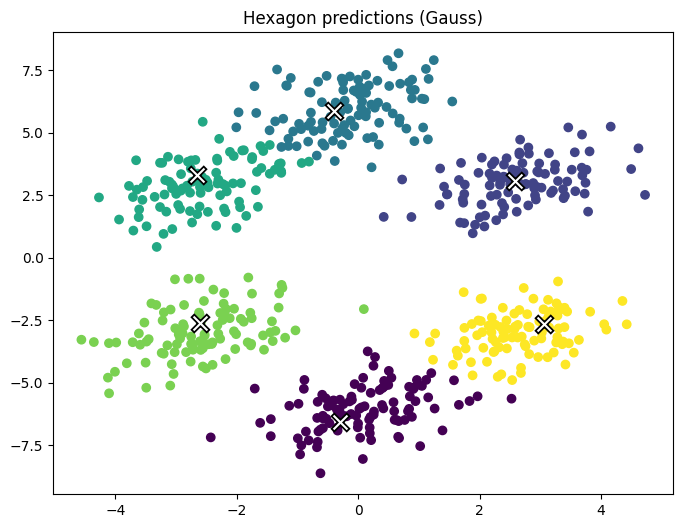

In [20]:
fig = plt.figure()
plt.scatter(x='x', y='y', data=hexagon, c=pred)
koh_hex_gauss.visualise_weights(fig=fig)
plt.title('Hexagon predictions (Gauss)')
plt.show()

### Mexican hat neighbourhood function

In [21]:
koh_hex_mex = KohonenNetwork(
    input_size=2, output_dim=(3, 2),
)

In [22]:
koh_hex_mex.train(
    data=hex_xy, epochs=90, init_lr=1, lr_decay_func=alpha_func, 
    neighbourhood_func=MexicanHat(nbhood_width_factor=0.1),
    verbosity_period=15, random_state=33,
)

Epoch 15 done!
   - mean abs delta = 0.6602164952152936
   - max abs delta = 10.826794673739226
Epoch 30 done!
   - mean abs delta = 0.31938232128496763
   - max abs delta = 8.024092199710374
Epoch 45 done!
   - mean abs delta = 0.22980065369368843
   - max abs delta = 6.7554407156089304
Epoch 60 done!
   - mean abs delta = 0.18056144073150351
   - max abs delta = 5.169436424878928
Epoch 75 done!
   - mean abs delta = 0.13167203799958854
   - max abs delta = 3.668167603667984
Epoch 90 done!
   - mean abs delta = 0.10909423696867158
   - max abs delta = 3.043739586498832


In [23]:
pred = koh_hex_mex.predict(hex_xy)
print_scores(hexagon['c'], pred)

Adjusted Rand score: 0.919
Adjusted Mutual Information score: 0.921


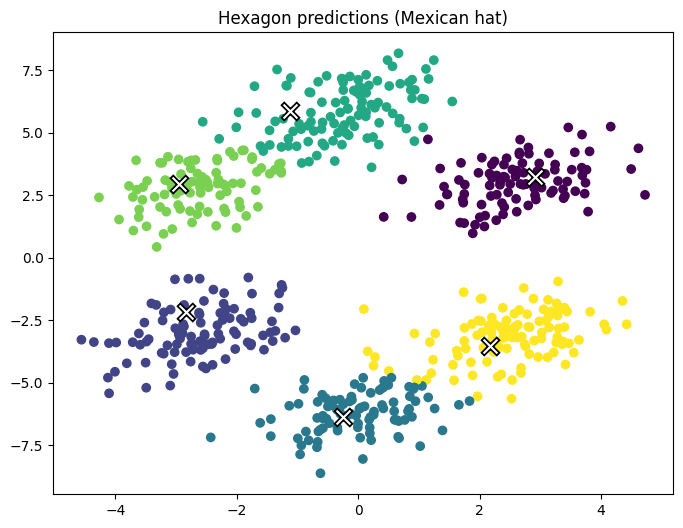

In [24]:
fig = plt.figure()
plt.scatter(x='x', y='y', data=hexagon, c=pred)
plt.title('Hexagon predictions (Mexican hat)')
koh_hex_mex.visualise_weights(fig=fig)
plt.show()

## `cube`

### Gaussian neighbourhood function

In [25]:
koh_cube_gauss = KohonenNetwork(
    input_size=3, output_dim=(4, 2),
)

In [26]:
koh_cube_gauss.train(
    data=cube_xyz, epochs=20, init_lr=1, lr_decay_func=alpha_func, 
    neighbourhood_func=GaussFunction(nbhood_width_factor=0.1),
    verbosity_period=10, random_state=28,
)

Epoch 10 done!
   - mean abs delta = 0.1704210760204565
   - max abs delta = 2.2247613697624096
Epoch 20 done!
   - mean abs delta = 0.02606439130806367
   - max abs delta = 0.8751052470931602


In [27]:
pred = koh_cube_gauss.predict(cube_xyz)
print_scores(cube['c'], pred)

Adjusted Rand score: 0.838
Adjusted Mutual Information score: 0.865


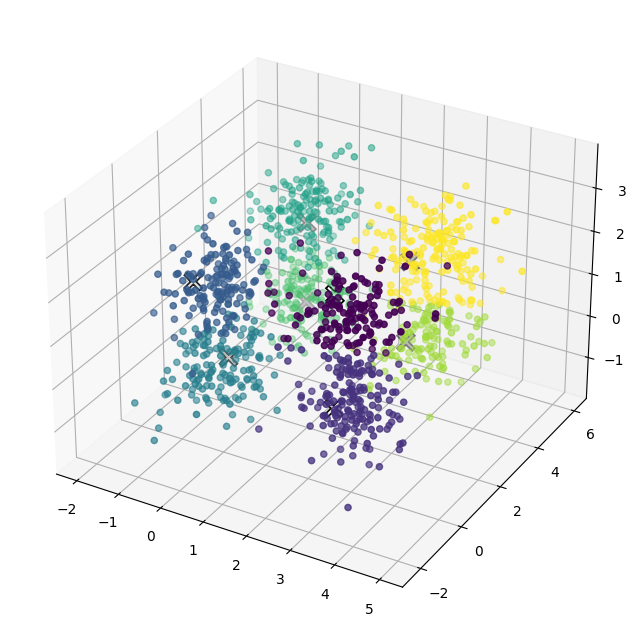

In [28]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter('x', 'y', 'z', data=cube, c=pred)
koh_cube_gauss.visualise_weights(fig=fig, ax=ax)
plt.show()

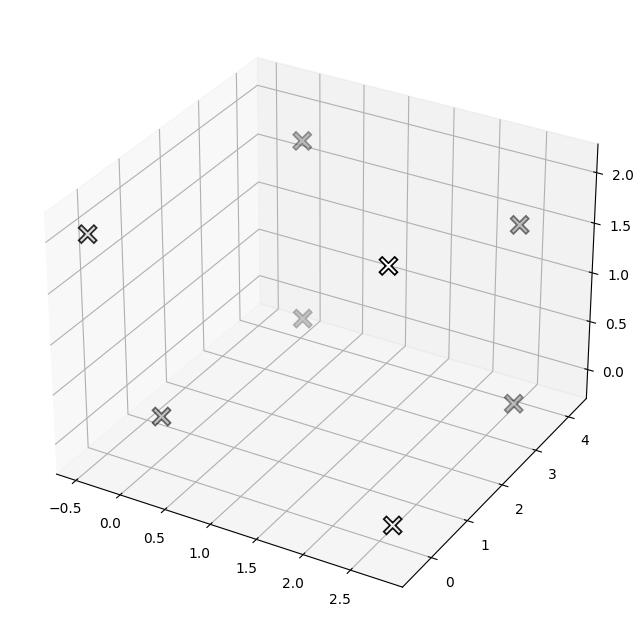

In [29]:
fig = plt.figure(figsize=(12, 8))
koh_cube_gauss.visualise_weights(fig=fig)
plt.show()

### Mexican hat neighbourhood function

In [30]:
koh_cube_mex = KohonenNetwork(
    input_size=3, output_dim=(4, 2),
)

In [31]:
koh_cube_mex.train(
    data=cube_xyz, epochs=50, init_lr=0.9, lr_decay_func=alpha_func, 
    neighbourhood_func=MexicanHat(nbhood_width_factor=0.1),
    verbosity_period=10, random_state=26,
)

Epoch 10 done!
   - mean abs delta = 0.4752847921863575
   - max abs delta = 6.193326933949308
Epoch 20 done!
   - mean abs delta = 0.11914681441344002
   - max abs delta = 5.246636124753759
Epoch 30 done!
   - mean abs delta = 0.08175246980073486
   - max abs delta = 3.4955688469582946
Epoch 40 done!
   - mean abs delta = 0.06207941426020847
   - max abs delta = 2.5727241007768673
Epoch 50 done!
   - mean abs delta = 0.04691261571092086
   - max abs delta = 2.1090169257908897


In [32]:
pred = koh_cube_mex.predict(cube_xyz)
print_scores(cube['c'], pred)

Adjusted Rand score: 0.847
Adjusted Mutual Information score: 0.875


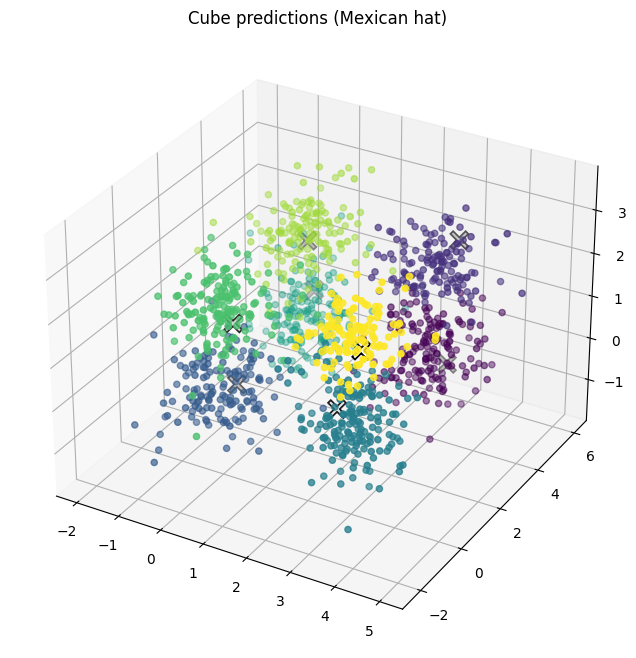

In [33]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter('x', 'y', 'z', data=cube, c=pred)
koh_cube_mex.visualise_weights(fig=fig, ax=ax)
plt.title('Cube predictions (Mexican hat)')
plt.show()

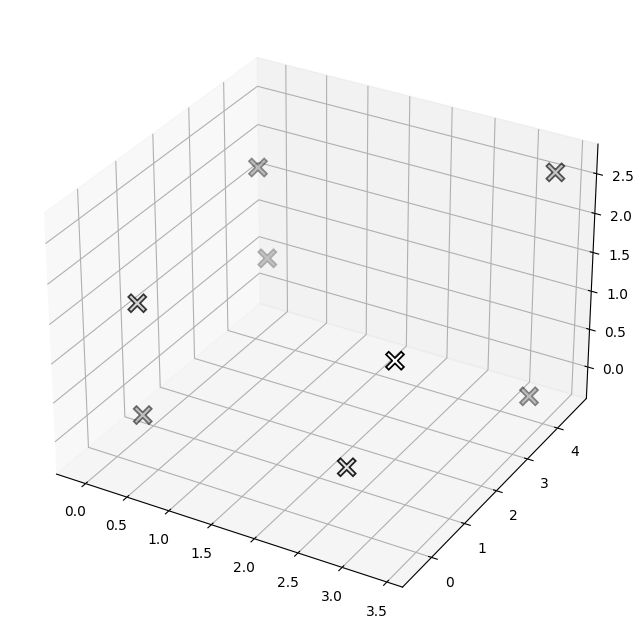

In [34]:
fig = plt.figure(figsize=(12, 8))
koh_cube_mex.visualise_weights(fig=fig)
plt.show()